# Statistical Data Analysis
## ADNI Alzheimer's Data
- Functions/algorithms used for calculating the statistics are in the sda module

In [1]:
# import packages
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import wrangle_adni to import/wrangle the data
from adnidatawrangling import wrangle_adni

# import custom modules eda, sda
# eda: exploratory data analysis module for additional functions
# sda: statistical data analysis module
import eda, sda

# set seaborn defaults
sns.set()

In [2]:
# import data, clean, and extract data
adni_comp, clin_data, scan_data = wrangle_adni()

In [3]:
# extract final exam data: only the last exam for each patient
final_exam = eda.get_final_exam(adni_comp)

# calculate the change in variables over the course of the study
eda.calc_deltas(final_exam)

### Statistical Questions:
- Change in biomarkers
    - Is there a difference between males and females in the amount of change observed in biomarkers with progression towards Alzheimer's Disease (AD)?
        - Further questions will be split by males/females if a difference is found
        - Permutation sampling will be used here to test if males/females come from the same distribution with regards to the amount of change observed
    - Which biomarkers show a statistically significant change as a person develops AD?
    - In biomarkers that show a change, what amount of change is correlated with progression towards AD?
- Biomarker baseline values as predictors of AD
    - Are there statistically significant thresholds for baseline values of a biomarker that suggest a person will develop AD?
        - How does this vary when including/excluding certain diagnosis groups?
            1. Looking at the entire sample of patients (all baseline diagnoses, including those with AD already)
            2. Only patients that were cognitively normal (CN) or had mild cognitive impairment (MCI) at baseline
            3. Including only patients that were CN at baseline
        - Exploratory data analysis suggests that there may be different thresholds for different genders

#### Change in Biomarkers
- From the exploratory data analysis, the following biomarkers were revealed as good candidates for statistical analysis
    - Clinical tests: CDRSB, ADAS11, ADAS13, MMSE, RAVLT_immediate
    - Brain scans: Hippocampus, Ventricles, WholeBrain, Entorhinal, MidTemp
- Approach
    - As sample sizes are not very large, bootstrapping will be used to generate a distribution for the change in each biomarker for patients that showed no change in diagnosis during the study
    - The null hypothesis is that when patients are divided into groups based on their change in diagnosis (CN to MCI, MCI to AD, CN to AD) all groups will have the same distribution as the group that ended the study with no change
        - May have to examine whether patients with no change in diagnosis that are not CN (MCI to MCI and AD to AD) impact the results
    - The alternative hypothesis is that the distributions for each group will be different enough that threshold values can be identified to signify beginning early treatment for MCI/AD or raising concerns about progression to AD
        - The goal of this analysis to produce confidence intervals for each diagnosis group
            - This will be used to identify an amount of change that should be of concern
            - There is less of a focus on obtaining p-values for this analysis

#### Changes in CDRSB
- Test for Differences Between Genders

A permutation test reveals that males/females should not be divided when analyzing changes in CDRSB. The observed difference between the mean change for males and mean change for females is nearly 0, which is what is expected under the null hypothesis that they come from the same distribution.

Distribution Test for Males/Females
Variable:  CDRSB_delta
If p < 0.05, then split the data by gender
p-value:  0.4447


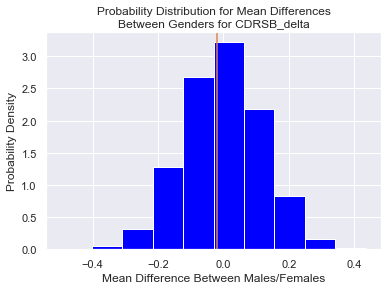

In [4]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'CDRSB_delta', 10000)

#### Changes in ADAS11
- Test for Differences Between Genders

Results of the permutations test suggest that ADAS11 analysis should be split by gender. Running the test multiple times consistently produces p-values < 0.05, suggesting there is less than a 5% probability that the changes in ADAS11 observed during this study are the same between males and females. 

Distribution Test for Males/Females
Variable:  ADAS11_delta
If p < 0.05, then split the data by gender
p-value:  0.04


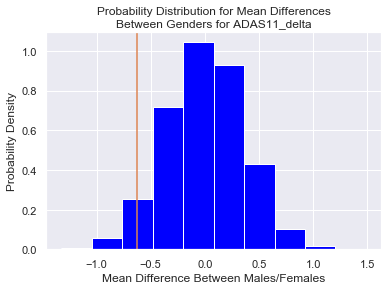

In [5]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'ADAS11_delta', 10000)

#### Changes in ADAS13
- Test for Differences Between Genders

The permutations test for ADAS13 changes did not have a significant p-value, but it was very close. Because the p-value was about 0.07 and because I'm splitting ADAS11 by gender, I will also split ADAS13 by gender. I may look at what happens when not split by gender to see if there is any substantial difference in outcomes.

Distribution Test for Males/Females
Variable:  ADAS13_delta
If p < 0.05, then split the data by gender
p-value:  0.083


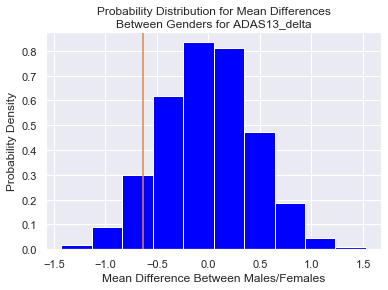

In [6]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'ADAS13_delta', 10000)

#### Changes in MMSE
- Test for Differences Between Genders

A permutation test suggests that males and females should not be separated for analysis. Probabilities of 0.11 to 0.13 were common, suggesting that there might be a difference in the mean changes observed between males and females, but there is enough uncertainty to keep males/females together. There was only a 16% difference between the means compared to the global mean with males/females grouped together.

Distribution Test for Males/Females
Variable:  MMSE_delta
If p < 0.05, then split the data by gender
p-value:  0.1223


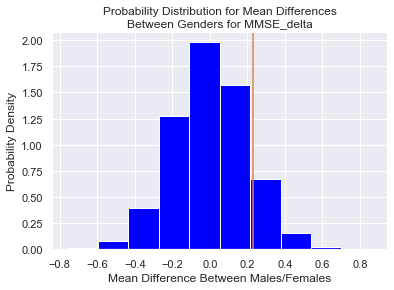

In [7]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'MMSE_delta', 10000)

In [8]:
fe_males, fe_females = sda.divide_genders(final_exam)

In [9]:
print('mean MMSE_delta for males: ', np.mean(fe_males.MMSE_delta))
print('mean MMSE_delta for females: ', np.mean(fe_females.MMSE_delta))
print('percent difference between means: ', 
      (np.mean(fe_females.MMSE_delta)-np.mean(fe_males.MMSE_delta))/np.mean(final_exam.MMSE_delta))


mean MMSE_delta for males:  -1.3348909657320873
mean MMSE_delta for females:  -1.566287878787879
percent difference between means:  0.160768639118335


#### Changes in RAVLT_immediate
- Test for Differences Between Genders

A permutation test for differences in RAVLT_immediate changes between genders suggests that the data can be considered together rather than being split by gender. The p-values around 0.16-0.17, suggest that observed mean differences in RAVLT_immediate changes could possibly be due to random chance.

Distribution Test for Males/Females
Variable:  RAVLT_delta
If p < 0.05, then split the data by gender
p-value:  0.1681


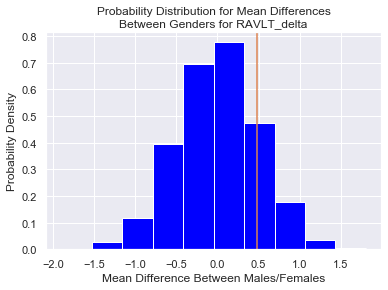

In [10]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'RAVLT_delta', 10000)

#### Summary of Gender Analysis on Changes in Clinical Biomarkers
ADAS11 and ADAS13 changes will be divided by gender when searching for correlation with progression to Alzheimer's Disease. CDRSB, MMSE, and RAVLT_immediate changes will use the combined dataset for males/females.

#### Changes in Hippocampus
- Test for Differences Between Genders

A permutation test suggests that males/females should not be separated when analyzing changes in Hippocampus volume. The p-value was large enough that there is too much uncertainty to divide the data by gender.

Distribution Test for Males/Females
Variable:  Hippocampus_delta
If p < 0.05, then split the data by gender
p-value:  0.2185


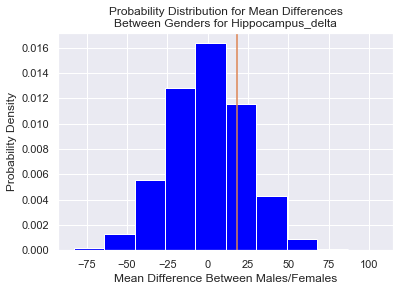

In [11]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Hippocampus_delta', 10000)

#### Changes in Ventricles
- Test for Differences Between Genders

Results from the permutations test on changes in ventricles reveal that there is a difference in the observed amount of change between males/females in the ADNI data. Therefore, the data will be divided by gender for analysis of changes in ventricles relating to a change in diagnosis.

Distribution Test for Males/Females
Variable:  Ventricles_delta
If p < 0.05, then split the data by gender
p-value:  0.0005


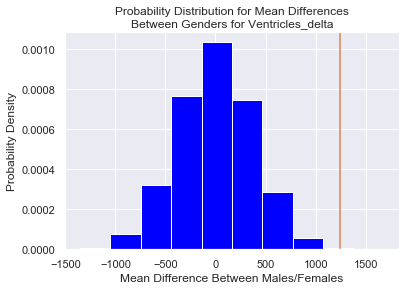

In [12]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Ventricles_delta', 10000)

#### Changes of WholeBrain
- Test for Differences Between Genders

Results from the permutation test suggest that the data should not be divided by gender for analysis of changes in WholeBrain relating to change in diagnosis. The probability is too high that the observed difference between males/females is random chance to split the data by gender.

Distribution Test for Males/Females
Variable:  WholeBrain_delta
If p < 0.05, then split the data by gender
p-value:  0.2004


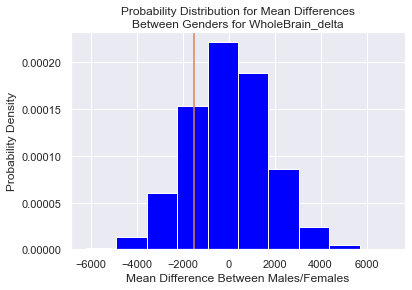

In [13]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'WholeBrain_delta', 10000)

#### Changes in Entorhinal
- Test for Differences Between Genders

The test for difference between males/females for changes in Entorhinal does not have a great enough probability to warrant separating the data by gender. It may be that a difference would have been found with a larger sample size, but there is not enough confidence to split the data by gender.

Distribution Test for Males/Females
Variable:  Entorhinal_delta
If p < 0.05, then split the data by gender
p-value:  0.1209


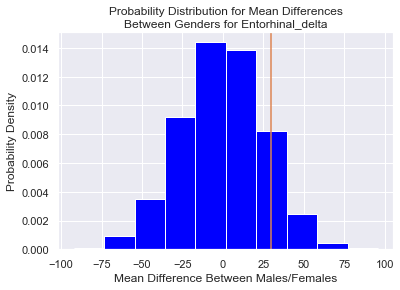

In [14]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Entorhinal_delta', 10000)

#### Change in MidTemp
- Test for Differences Between Genders

The permutations test for differences between genders for MidTemp changes consistently produces a p-value < 0.05. Therefore the data will be split by gender when looking for a correlation with progression towards AD.

Distribution Test for Males/Females
Variable:  MidTemp_delta
If p < 0.05, then split the data by gender
p-value:  0.0371


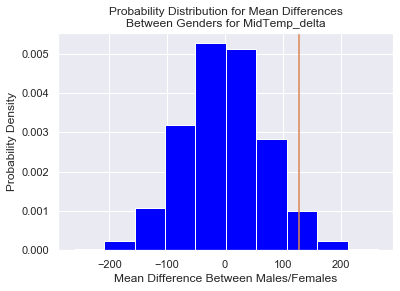

In [15]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'MidTemp_delta', 10000)

#### Summary of the Effect of Gender on Change in Biomarkers from Scan Data

The data for changes in Ventricles and MidTemp will be split by gender, while the Hippocampus, WholeBrain, and Entorhinal data will contain data from both genders.

#### Using Change in Biomarkers to Predict a Change in Diagnosis

Bootstrap distributions were created for each diagnosis group. These were used to find confidence intervals that will be useful in predicting whether or not a given change in a specific biomarker indicates a progression towards AD. 

In [16]:
# divide data into groups based on change in diagnosis
# groups were identified in the first part of this analysis that need to be split by gender
# those are ADAS11, ADAS13, Ventricles, and MidTemp (divided by gender)

no_change, cn_mci, mci_ad, cn_ad = sda.get_deltadx_groups(final_exam)
m_no_change, m_cn_mci, m_mci_ad, m_cn_ad = sda.get_deltadx_groups(fe_males)
f_no_change, f_cn_mci, f_mci_ad, f_cn_ad = sda.get_deltadx_groups(fe_females)

#### Changes CDRSB for Predicting Change in Diagnosis

Analysis of CDRSB suggests that a change in CDRSB of 0.60 is worth noting concern. In fact, over 95% of people with a change in CDRSB greater than the threshold value of about 0.60 developed AD during the study, including 100% of the people that went from CN to AD. This threshold value was less effective at detecting progression from CN to MCI, with only 46% of patients that progressed from CN to MCI having a change in CDRSB of at least 0.60. Only about 4% of patients with a change in CDRSB of 0.60 or more ended the study as CN.

95% Confidence Interval:  0.41974617903930134  to  0.601528384279476


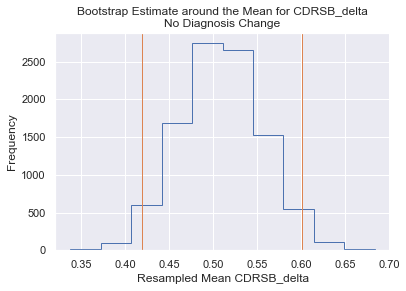

In [17]:
# calculate the confidence interval for patients with no change in diagnosis
CDRSB_delta_conf = sda.bs(no_change, 'CDRSB_delta', 10000)

In [18]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'CDRSB_delta', CDRSB_delta_conf)

Percent exceeding threshold that ended CN:  3.63 %
Percent exceeding threshold that ended MCI:  27.12 %
Percent exceeding threshold that ended AD:  69.25 %
Percent progressing CN to MCI exceeding threshold:  45.95 %
Percent Progressing MCI to AD exceeding threshold:  95.45 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS11 for Males

The threshold value for males appears to be an increase of about 1.69 for ADAS11. This would be a very rare case for someone that didn't experience a diagnosis change, while 57% of male patients that progressed from CN to MCI had an ADAS11 change of at least 1.69. More than 80% of all males that developed AD had an ADAS11 increase of at least 1.69, while every male patient that progressed from CN to AD had an ADAS11 change at least this high. About 15% of males patients with ADAS11 change exceeding the threshold ended the study with a CN diagnosis. For this reason, it would be suggested to use this threshold along with other biomarkers to predict a diagnosis.

95% Confidence Interval:  0.7520456827309234  to  1.6963097389558235


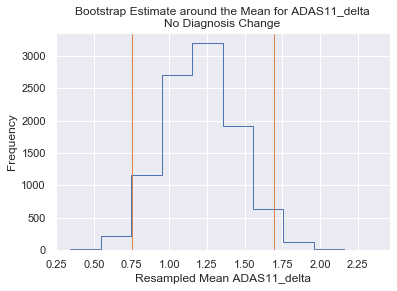

In [19]:
# calculate the confidence interval for patients with no change in diagnosis
m_adas11_conf = sda.bs(m_no_change, 'ADAS11_delta', 10000)

In [20]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'ADAS11_delta', m_adas11_conf, gender='males')

Percent exceeding threshold that ended CN:  14.53 %
Percent exceeding threshold that ended MCI:  35.29 %
Percent exceeding threshold that ended AD:  50.17 %
Percent progressing CN to MCI exceeding threshold:  57.14 %
Percent Progressing MCI to AD exceeding threshold:  80.58 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS11 for Females

Females displayed a higher threshold for ADAS11 change than males. The threshold value for females is about 2.05 compared to males 1.69. An ADAS11 change of 2.05 or more for females was observed in 85% or more for patients that developed AD, with 100% of female patients that progressed from CN to AD having changes above this threshold. About 50% of females that progressed from CN to MCI had an ADAS11 change of at least 2.05. About 14% of females that had an ADAS11 change at or above threshold ended the study as CN. Additional biomarkers should probably be considered along with ADAS11 changes for females given this result.

95% Confidence Interval:  1.1252380382775116  to  2.059929425837322


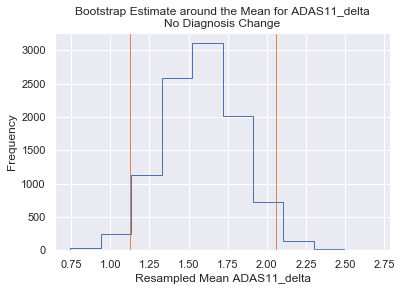

In [21]:
# calculate the confidence interval for patients with no change in diagnosis
f_adas11_conf = sda.bs(f_no_change, 'ADAS11_delta', 10000)

In [22]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'ADAS11_delta', f_adas11_conf, gender='females')

Percent exceeding threshold that ended CN:  14.35 %
Percent exceeding threshold that ended MCI:  27.35 %
Percent exceeding threshold that ended AD:  58.3 %
Percent progressing CN to MCI exceeding threshold:  50.0 %
Percent Progressing MCI to AD exceeding threshold:  84.93 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


# Change in ADAS13 for Males

The threshold for experiencing a diagnosis change for change in ADAS13 for males was 2.12. About 52% of males that progressed from CN to MCI displayed a change of at least 2.12, while about 80% of males who progressed from MCI to AD exhibited an ADAS13 change of at least 2.12, with 100% of males that progressed from CN to AD displaying a change of at least 2.12. About 12% of males with ADAS13 changes exceeding the threshold ended the study as CN. Therefore this threshold should probably be considered with other biomarkers when trying to predict a diagnosis.

95% Confidence Interval:  1.0228890562249  to  2.134078313253011


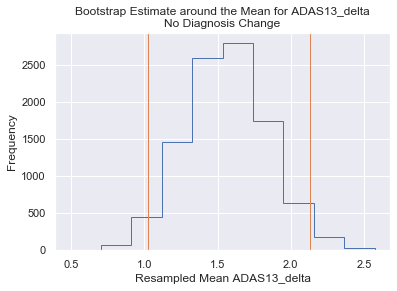

In [23]:
# calculate the confidence interval for patients with no change in diagnosis
m_adas13_conf = sda.bs(m_no_change, 'ADAS13_delta', 10000)

In [24]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

sda.eval_bs(final_exam, 'ADAS13_delta', m_adas13_conf, gender='males')

Percent exceeding threshold that ended CN:  12.14 %
Percent exceeding threshold that ended MCI:  37.86 %
Percent exceeding threshold that ended AD:  50.0 %
Percent progressing CN to MCI exceeding threshold:  52.38 %
Percent Progressing MCI to AD exceeding threshold:  79.61 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS13 for Females

Similar to ADAS11, females had a higher threshold for ADAS13 changes that are associated with a change in diagnosis. 100% of females who progressed from CN to AD had an ADAS13 change of at least 2.40, with about 89% of females who progressed from MCI to AD above this threshold as well. It is important to note that nearly 63% of females who only progressed from CN to MCI displayed a change in ADAS13 above the threshold, suggesting a change in ADAS13 of 2.4 or more alone is not enough to strongly predict a progression to AD. This is especially true when considering about 19% of females with ADAS13 changes exceeding the threshold ended the study with a CN diagnosis.

95% Confidence Interval:  1.2623911483253594  to  2.4058857655502406


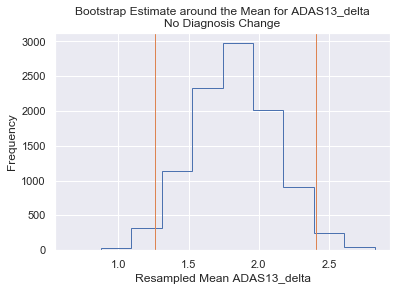

In [25]:
# calculate the confidence interval for patients with no change in diagnosis
f_adas13_conf = sda.bs(f_no_change, 'ADAS13_delta', 10000)

In [26]:
sda.eval_bs(final_exam, 'ADAS13_delta', f_adas13_conf, gender='females')

Percent exceeding threshold that ended CN:  19.33 %
Percent exceeding threshold that ended MCI:  26.47 %
Percent exceeding threshold that ended AD:  54.2 %
Percent progressing CN to MCI exceeding threshold:  62.5 %
Percent Progressing MCI to AD exceeding threshold:  89.04 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Changes in MMSE

MMSE analysis for males/females points to a threshold change of about -1.01 for progression. While this change is extremely rare for patients that displayed no change in diagnosis, 100% of patients that progressed from CN to AD during the study exhibited an MMSE change at least this large, while about 84% of patients that progressed from MCI to AD also displayed a change this large. Only about 27% of patients that progressed from CN to MCI had an MMSE change of -1.01 or larger, suggesting this is an ok indicator of progression to AD. About 15% of patients with an MMSE change exceeding threshold ended the study as CN. This measure should probably be considered with other biomarkers for this reason.

95% Confidence Interval:  -1.0065502183406114  to  -0.6517467248908297


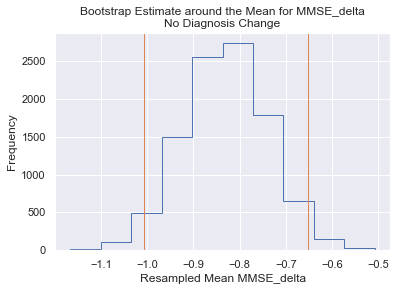

In [27]:
# calculate the confidence interval for patients with no change in diagnosis
mmse_conf = sda.bs(no_change, 'MMSE_delta', 10000)

In [28]:
sda.eval_bs(final_exam, 'MMSE_delta', mmse_conf)

Percent exceeding threshold that ended CN:  14.89 %
Percent exceeding threshold that ended MCI:  28.0 %
Percent exceeding threshold that ended AD:  57.11 %
Percent progressing CN to MCI exceeding threshold:  27.03 %
Percent Progressing MCI to AD exceeding threshold:  83.52 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in RAVLT_immediate

Males and females were analyzed together for RAVLT_immediate. The threshold for RAVLT_immediate change was -1.90 for males/females. For patients progressing from CN to AD, 100% were above this threshold, while about 74% of patients that progressed from MCI to AD showed RAVLT_immediate changes at least this large. Nearly 60% of patients that progressed from CN to MCI displayed a RAVLT_immediate change of at least -1.90, suggesting this threshold is good at predicting a change in diagnosis, but not necessarily good for predicting AD when considered alone. About 23% of patients that exceeded this change in RAVLT threshold ended the study with a CN diagnosis.

95% Confidence Interval:  -1.921424672489083  to  -0.9104803493449781


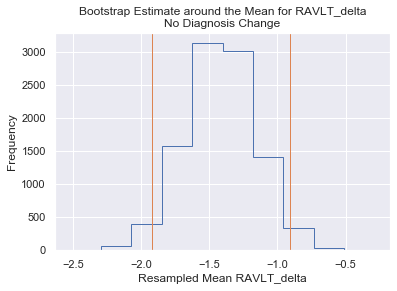

In [29]:
# calculate the confidence interval for patients with no change in diagnosis
ravlt_conf = sda.bs(no_change, 'RAVLT_delta', 10000)

In [30]:
sda.eval_bs(final_exam, 'RAVLT_delta', ravlt_conf)

Percent exceeding threshold that ended CN:  23.44 %
Percent exceeding threshold that ended MCI:  35.41 %
Percent exceeding threshold that ended AD:  41.15 %
Percent progressing CN to MCI exceeding threshold:  59.46 %
Percent Progressing MCI to AD exceeding threshold:  74.43 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in Hippocampus

Hippocampus changes had a threshold value of about -281. When evaluating this threshold, it appears that many patients progress to AD with hippocampus changes lower than this threshold. Exactly 80% of patients that progressed from CN to AD had a hippocampus change of at least -281, with about 77% of patients that progressed from MCI to AD with a change above the threshold, and nearly 60% of patients that went from CN to MCI were above this threshold. About 26% of patients exceeding this threshold ended the study with a CN diagnosis, suggesting other biomarkers should be included if using change in Hippocampus to predict progression to AD.

95% Confidence Interval:  -281.16741266375544  to  -236.8890829694323


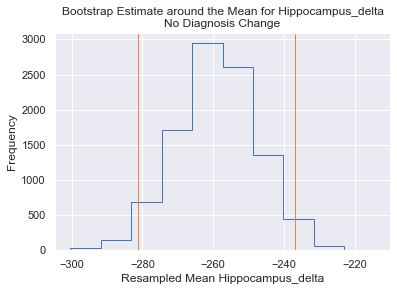

In [31]:
# calculate the confidence interval for patients with no change in diagnosis
hippo_conf = sda.bs(no_change, 'Hippocampus_delta', 10000)

In [32]:
sda.eval_bs(final_exam, 'Hippocampus_delta', hippo_conf)

Percent exceeding threshold that ended CN:  26.22 %
Percent exceeding threshold that ended MCI:  32.87 %
Percent exceeding threshold that ended AD:  40.91 %
Percent progressing CN to MCI exceeding threshold:  59.46 %
Percent Progressing MCI to AD exceeding threshold:  77.27 %
Percent Progressing CN to AD exceeding threshold:  80.0 %


#### Change in Ventricles for Males

The threshold value for change in ventricles for males was about 5762. 100% of patients that progressed from CN to AD exceeded this threshold, while about 79% that progressed from MCI to AD exceeded this change. 2/3 of patients that progressed from CN to MCI exceeded this threshold as well. About 19% of patients that exceeded this threshold ended the study with a diagnosis of CN, but most of the patients that showed a change in diagnosis had ventricle changes greater than the threshold value. Hence, a change in ventricles greater than the threshold value should certainly warrant examining other biomarkers for signs of disease progression.

95% Confidence Interval:  4843.340210843374  to  5766.816817269077


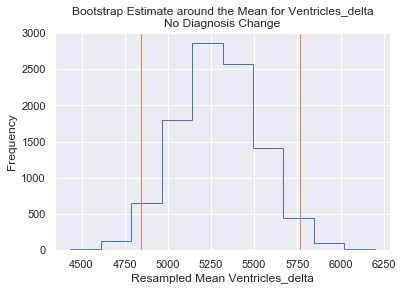

In [33]:
# calculate the confidence interval for patients with no change in diagnosis
m_vent_conf = sda.bs(m_no_change, 'Ventricles_delta', 10000)

In [34]:
sda.eval_bs(final_exam, 'Ventricles_delta', m_vent_conf, gender='males')

Percent exceeding threshold that ended CN:  18.79 %
Percent exceeding threshold that ended MCI:  35.82 %
Percent exceeding threshold that ended AD:  45.39 %
Percent progressing CN to MCI exceeding threshold:  66.67 %
Percent Progressing MCI to AD exceeding threshold:  78.64 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in Ventricles for Females

The story with ventricle changes in females is different than for males. Females displayed a lower threshold, however, a larger percentage of females that exceeded this threshold ended the study with a CN diagnosis (about 24%). Also, many females that developed AD, had ventricle changes that did not exceed the threshold. This suggests that changes in ventricles doesn't predict progression of AD for females as well as it does for males.

95% Confidence Interval:  3848.860167464115  to  4672.568480861243


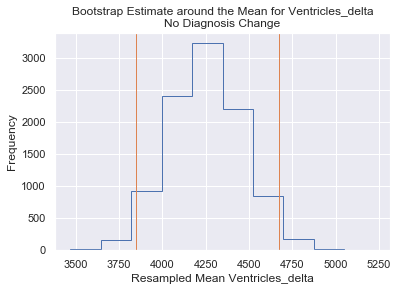

In [35]:
# calculate the confidence interval for patients with no change in diagnosis
f_vent_conf = sda.bs(f_no_change, 'Ventricles_delta', 10000)

In [36]:
sda.eval_bs(final_exam, 'Ventricles_delta', f_vent_conf, gender='females')

Percent exceeding threshold that ended CN:  23.61 %
Percent exceeding threshold that ended MCI:  28.24 %
Percent exceeding threshold that ended AD:  48.15 %
Percent progressing CN to MCI exceeding threshold:  56.25 %
Percent Progressing MCI to AD exceeding threshold:  83.56 %
Percent Progressing CN to AD exceeding threshold:  66.67 %


#### Whole Brain Changes

The whole brain threshold value was about -21247. However, about 27% of patients that exceeded this threshold of change during the study ended with a CN diagnosis. Also, only 40% of patients that progressed from CN to AD during the study displayed whole brain changes at least this large. Given these values, it appears that whole brain changes are not good predictors for progression to AD for the patients in this study.

95% Confidence Interval:  -21284.158651746726  to  -17892.66926855895


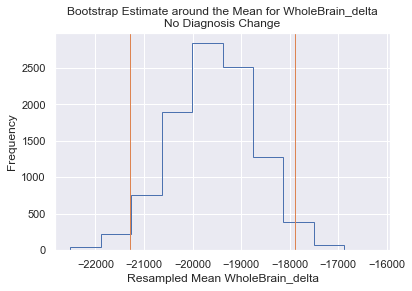

In [37]:
# calculate the confidence interval for patients with no change in diagnosis
wb_conf = sda.bs(no_change, 'WholeBrain_delta', 10000)

In [38]:
sda.eval_bs(final_exam, 'WholeBrain_delta', wb_conf)

Percent exceeding threshold that ended CN:  27.31 %
Percent exceeding threshold that ended MCI:  31.73 %
Percent exceeding threshold that ended AD:  40.96 %
Percent progressing CN to MCI exceeding threshold:  54.05 %
Percent Progressing MCI to AD exceeding threshold:  73.3 %
Percent Progressing CN to AD exceeding threshold:  40.0 %


#### Entorhinal Changes

Entorhinal changes show the same basic story as whole brain. A relatively high percentage of patients that exceeded the threshold of -176 and ended the study with a CN diagnosis (about about 29%). Also, many of the patients that showed a change in diagnosis towards AD did not exceed the threshold value. Thus, Entorhinal changes alone are bad predictors of progression in diagnosis for the patients in this study.

95% Confidence Interval:  -176.09437772925764  to  -123.22352620087337


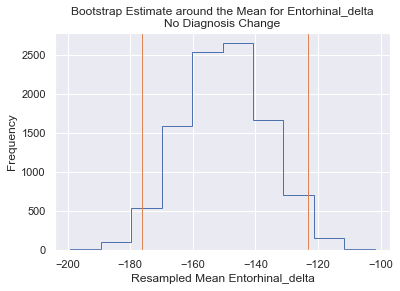

In [39]:
# calculate the confidence interval for patients with no change in diagnosis
ent_conf = sda.bs(no_change, 'Entorhinal_delta', 10000)

In [40]:
sda.eval_bs(final_exam, 'Entorhinal_delta', ent_conf)

Percent exceeding threshold that ended CN:  28.5 %
Percent exceeding threshold that ended MCI:  33.85 %
Percent exceeding threshold that ended AD:  37.65 %
Percent progressing CN to MCI exceeding threshold:  40.54 %
Percent Progressing MCI to AD exceeding threshold:  73.3 %
Percent Progressing CN to AD exceeding threshold:  40.0 %


#### MidTemp Changes for Males

MidTemp changes for males also show the same trend as whole brain and entorhinal. A relatively large percentage of patients that exceeded the threshold of -683 ended the study with a CN diagnosis (about 22%). Also, many patients that displayed a change in diagnosis towards AD did not exceed this threshold. MidTemp change in males above threshold was not a good predictor for change in diagnosis for this study group.

95% Confidence Interval:  -682.2843875502008  to  -491.722389558233


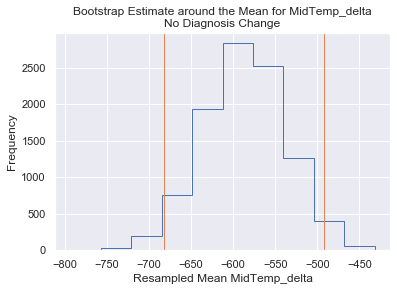

In [41]:
# calculate the confidence interval for patients with no change in diagnosis
m_mt_conf = sda.bs(m_no_change, 'MidTemp_delta', 10000)

In [42]:
sda.eval_bs(final_exam, 'MidTemp_delta', m_mt_conf, gender='males')

Percent exceeding threshold that ended CN:  22.15 %
Percent exceeding threshold that ended MCI:  35.18 %
Percent exceeding threshold that ended AD:  42.67 %
Percent progressing CN to MCI exceeding threshold:  66.67 %
Percent Progressing MCI to AD exceeding threshold:  72.82 %
Percent Progressing CN to AD exceeding threshold:  50.0 %


#### MidTemp Changes for Females

The threshold for females was about -774, which was higher than the value for males. However, a similar trend exists, with nearly 27% of females that exceeded the threshold for MidTemp changes ending the study with a CN diagnosis. It should be noted, though, that over 2/3 of females that got worse during the study exhibited MidTemp changes above the threshold. For this reason, MidTemp changes could be considered an ok predictor for females in this study group when considered with other biomarkers.

95% Confidence Interval:  -771.6302033492822  to  -592.6748205741627


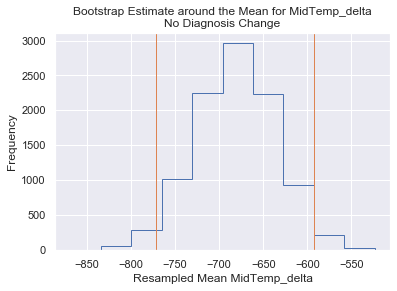

In [43]:
# calculate the confidence interval for patients with no change in diagnosis
f_mt_conf = sda.bs(f_no_change, 'MidTemp_delta', 10000)

In [44]:
sda.eval_bs(final_exam, 'MidTemp_delta', f_mt_conf, gender='females')

Percent exceeding threshold that ended CN:  26.97 %
Percent exceeding threshold that ended MCI:  26.14 %
Percent exceeding threshold that ended AD:  46.89 %
Percent progressing CN to MCI exceeding threshold:  62.5 %
Percent Progressing MCI to AD exceeding threshold:  82.19 %
Percent Progressing CN to AD exceeding threshold:  66.67 %


#### Baseline Values for Predicting Alzheimer's Disease
- From the exploratory data analysis, the following biomarkers emerged as good candidates for statistical testing
    - Clinical tests: ADAS11 and ADAS13
    - Brain scans: Hippocampus and MidTemp
- Approach
    - The data will be divided by final diagnosis into four groups: those that ended the study with AD and those that didn't, with both of these groups divided by gender (permutation tests indicated a difference in baseline values between genders for all four biomarkers analyzed)
    - A permutation test will be performed to ascertain whether or not the two groups have the same distribution of baseline values
    - If the distributions are different enough bootstrap distribution will be generated for each group to identify the threshold values that can best predict Alzheimer's disease.
    - The null hypothesis is that both the group that ended with AD and the non AD group will have the same distribution of baseline values
    - The alternative hypothesis is that the group that ended the study with AD will have a different baseline distribution for the analyzed biomarkers
        - p-values from the permutations test will be used to determine whether or not there is a difference between groups
        - If a difference is found, then key thresholds for baseline values will be identified including the mean of each distribution, the baseline values at which 95%, 75%, 50%, and 25% or more of patients ended with AD.

#### Groups are being divided by gender

The statistical tests below show a difference between males/females for all four parameters analyzed (see below).

Distribution Test for Males/Females
Variable:  ADAS11_bl
If p < 0.05, then split the data by gender
p-value:  0.0033


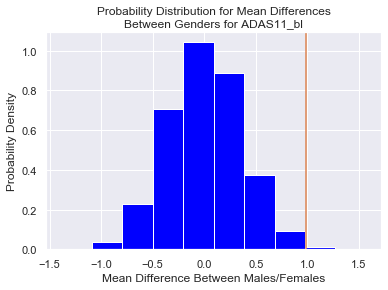

In [45]:
sda.test_gender_effect(final_exam, 'ADAS11_bl', 10000)

Distribution Test for Males/Females
Variable:  ADAS13_bl
If p < 0.05, then split the data by gender
p-value:  0.0019


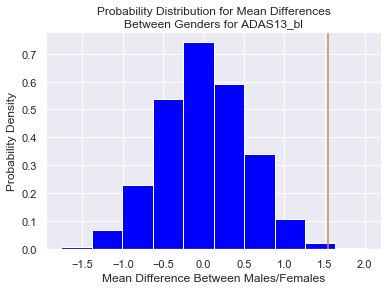

In [46]:
sda.test_gender_effect(final_exam, 'ADAS13_bl', 10000)

Distribution Test for Males/Females
Variable:  Hippocampus_bl
If p < 0.05, then split the data by gender
p-value:  0.0


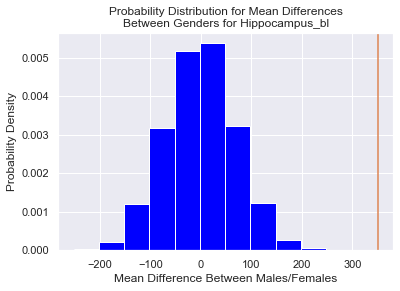

In [47]:
sda.test_gender_effect(final_exam, 'Hippocampus_bl', 10000)

Distribution Test for Males/Females
Variable:  MidTemp_bl
If p < 0.05, then split the data by gender
p-value:  0.0


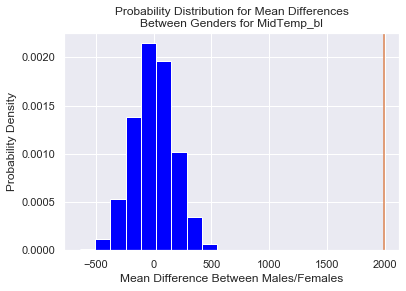

In [48]:
sda.test_gender_effect(final_exam, 'MidTemp_bl', 10000)

#### Tests for a difference between in baseline biomarkers AD vs. Non AD

These tests determine whether or not the observed difference between patients that ended the study with AD is likely due to random chance. The results strongly suggest that the observed difference between groups is higher than would be expected under the null hypothesis, that the distributions are the same. It should be noted that these tests were found to be significant for all baseline biomarkers in the study, not just the four I originally chose to examine.

Distribution Test for AD/Non AD
Variable:  ADAS11_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS11_bl
p-value:  0.0


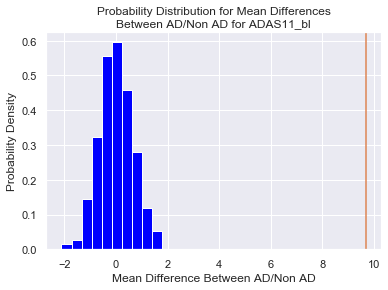

In [49]:
sda.bl_perm_test(final_exam, 'ADAS11_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  ADAS11_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS11_bl
p-value:  0.0


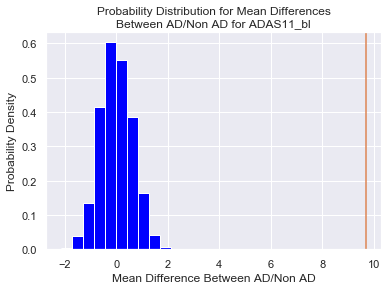

In [50]:
sda.bl_perm_test(final_exam, 'ADAS11_bl', 'Female', 1000)

Distribution Test for AD/Non AD
Variable:  ADAS13_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS13_bl
p-value:  0.0


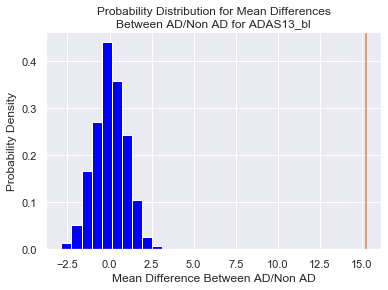

In [51]:
sda.bl_perm_test(final_exam, 'ADAS13_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  ADAS13_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS13_bl
p-value:  0.0


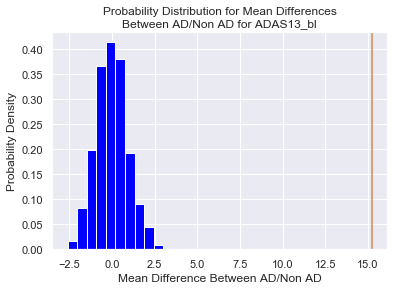

In [52]:
sda.bl_perm_test(final_exam, 'ADAS13_bl', 'Female', 1000)

Distribution Test for AD/Non AD
Variable:  Hippocampus_bl
If p < 0.05, then patients that ended AD had a different distribution for  Hippocampus_bl
p-value:  0.0


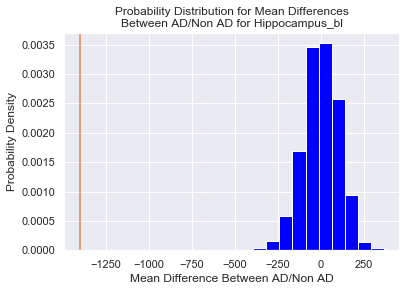

In [53]:
sda.bl_perm_test(final_exam, 'Hippocampus_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  Hippocampus_bl
If p < 0.05, then patients that ended AD had a different distribution for  Hippocampus_bl
p-value:  0.0


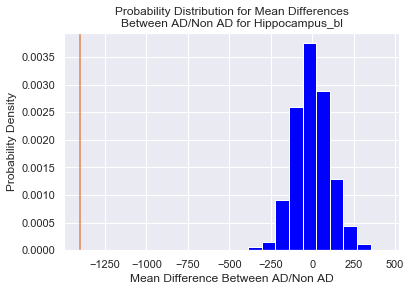

In [54]:
sda.bl_perm_test(final_exam, 'Hippocampus_bl', 'Female', 1000)

Distribution Test for AD/Non AD
Variable:  MidTemp_bl
If p < 0.05, then patients that ended AD had a different distribution for  MidTemp_bl
p-value:  0.0


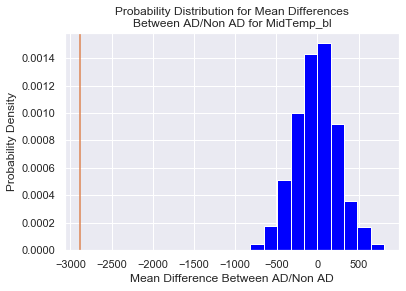

In [55]:
sda.bl_perm_test(final_exam, 'MidTemp_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  MidTemp_bl
If p < 0.05, then patients that ended AD had a different distribution for  MidTemp_bl
p-value:  0.0


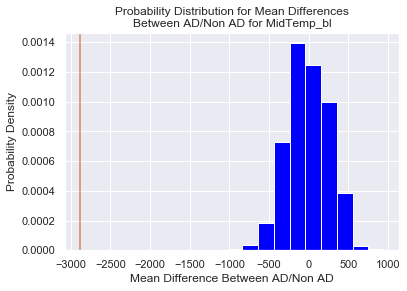

In [56]:
sda.bl_perm_test(final_exam, 'MidTemp_bl', 'Female', 1000)

#### Some Assumptions for interpretation of results of baseline tests
- A diagnosis would occur within the time limit of a patient's first to last visit
    - The overall duration of the study was about 11 years, with most patients not having 11 years worth of data
- We are assuming also that this sample of patients is representative of the general population
    - This assumption is important for applying these thresholds to other potential patients
    - Further exploration of these calculated thresholds should be performed to test their consistency and applicability to other samples of patients

#### ADAS11 Baseline Values for Males

The plot below shows that a threshold value of 10.4 for ADAS11 baseline value would be a decent predictor of Alzheimer's Disease. Interpreting the graph, shows that when bootstrapping was used to calculate mean confidence intervals from the data, the 75th percentile for patients that weren't diagnosed with AD was about 10.4. If our sample of patients is representative of the population, we would expect about 75% of patients with a baseline ADAS11 of 10.4 or lower to not be diagnosed with AD in a time duration equal to our study. Likewise the lower 25th bootstrap percentile for patients that were diagnosed with AD had a score of about 11.3. This means that if our sample is representative, we would expect 75% or more of people that are diagnosed with AD to have a baseline ADAS11 score of at least 11.3.

Mean 75th percentile of bootstrap samples for non AD patients:  10.462564999999975
Mean 25th percentile of bootstrap samples for AD patients:  11.318685749999904


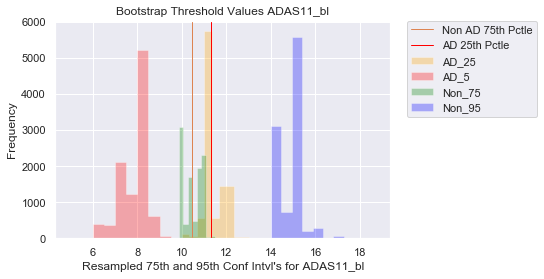

In [57]:
sda.bs_percentile(final_exam, 'ADAS11_bl', 10000, 'males')

#### Baseline ADAS11 for Females

The 75th percentile for baseline ADAS11 for females that didn't receive a diagnosis of AD was about 8.8. This means that we would expect about 75% of females with a score of 8.8 or less to not develop AD within the time period of this study. The lower 25th percentile for baseline ADAS11 was about 11.6, meaning we would identify most of the at risk females for AD using the 8.8 threshold. 

Mean 75th percentile of bootstrap samples for non AD patients:  8.777543500000059
Mean 25th percentile of bootstrap samples for AD patients:  11.579240999999996


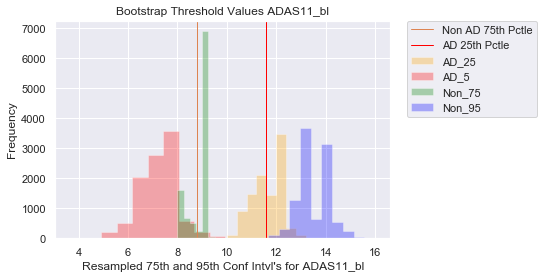

In [58]:
sda.bs_percentile(final_exam, 'ADAS11_bl', 10000, 'females')

#### Baseline ADAS11 overall interpretation

Using the 75th percentile for patients that didn't develop AD as a threshold would help identify most of the patients that developed AD for this study. There would be a few that this threshold would not catch, and there would be a few that would be put on alert that would not develop AD, as indicated by the red 5th percentile for AD patients being lower than the 75th percentile for non AD patients for both males and females. The posibility for false positive results would of course exist, as about 25% of patients that don't develop AD would be expected to have this baseline value. To decrease false positives, you could use the 25th percentile value for patients that did develop AD, but this leaves out alerting the average 25% of patients that develop AD with baseline scores below threshold. Both the 75th percentile for patients that didn't develop AD and the lower 25th percentile for patients that did should be considered thresholds with certain associated risk probabilities.